In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('shopping_behavior_updated.csv')

In [34]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [36]:
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [37]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [38]:
df['Shipping Type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [39]:
df['Payment Method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [40]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [41]:
df.groupby('Item Purchased')['Category'].value_counts().sort_values(ascending=False)

Item Purchased  Category   
Blouse          Clothing       171
Pants           Clothing       171
Jewelry         Accessories    171
Shirt           Clothing       169
Dress           Clothing       166
Sweater         Clothing       164
Jacket          Outerwear      163
Belt            Accessories    161
Coat            Outerwear      161
Sunglasses      Accessories    161
Sandals         Footwear       160
Socks           Clothing       159
Skirt           Clothing       158
Scarf           Accessories    157
Shorts          Clothing       157
Hat             Accessories    154
Handbag         Accessories    153
Hoodie          Clothing       151
Shoes           Footwear       150
T-shirt         Clothing       147
Sneakers        Footwear       145
Boots           Footwear       144
Backpack        Accessories    143
Gloves          Accessories    140
Jeans           Clothing       124
Name: count, dtype: int64

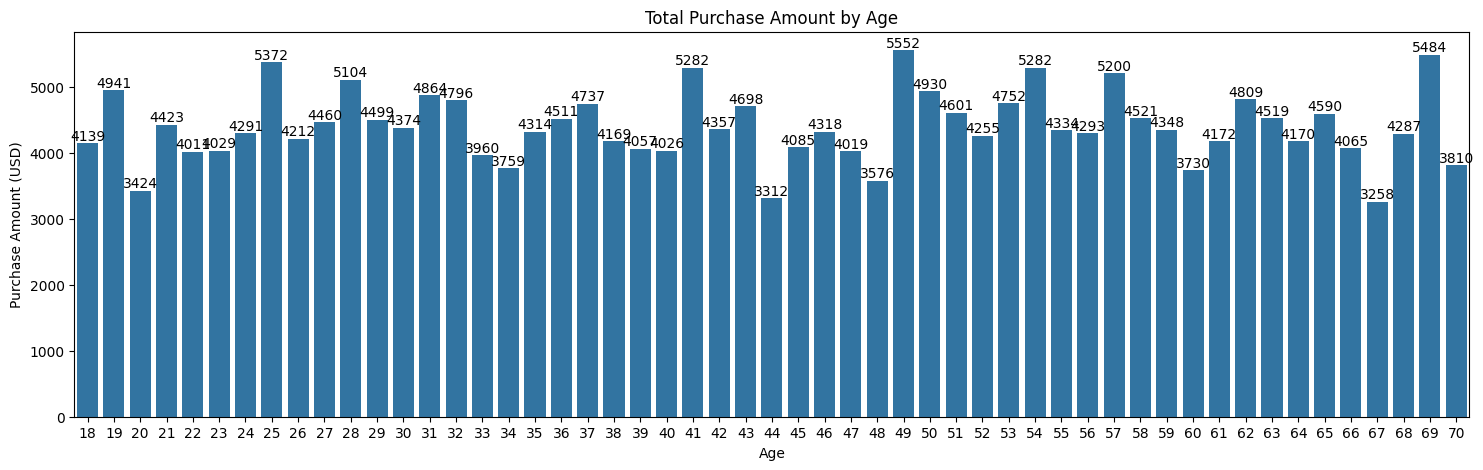

In [42]:
sales_age = df.groupby('Age')['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='Age', y='Purchase Amount (USD)', data=sales_age)
plt.title('Total Purchase Amount by Age')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom')

plt.show()

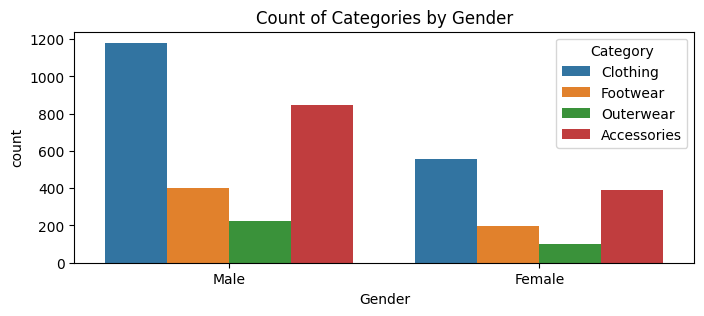

In [43]:
plt.figure(figsize=(8, 3))
sns.countplot(x='Gender', hue='Category', data=df)
plt.title('Count of Categories by Gender')
plt.show()

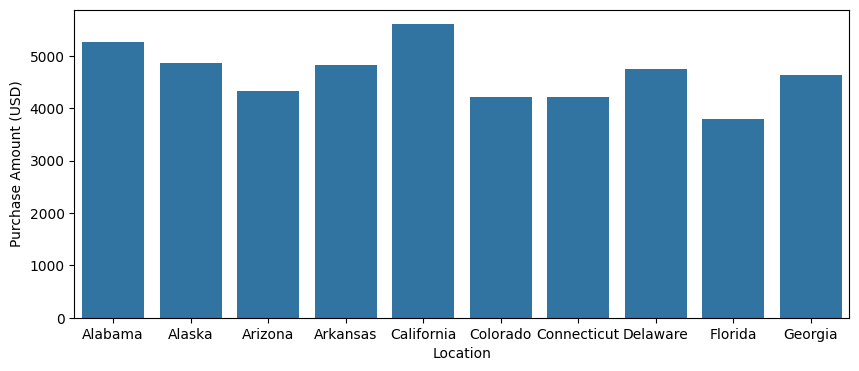

Location with max purchase amount: Montana ($5784)


In [44]:
location_sales = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x='Location', y='Purchase Amount (USD)', data=location_sales)
plt.show()

max_location = df.groupby('Location')['Purchase Amount (USD)'].sum().idxmax()
max_amount = df.groupby('Location')['Purchase Amount (USD)'].sum().max()
print(f"Location with max purchase amount: {max_location} (${max_amount})")

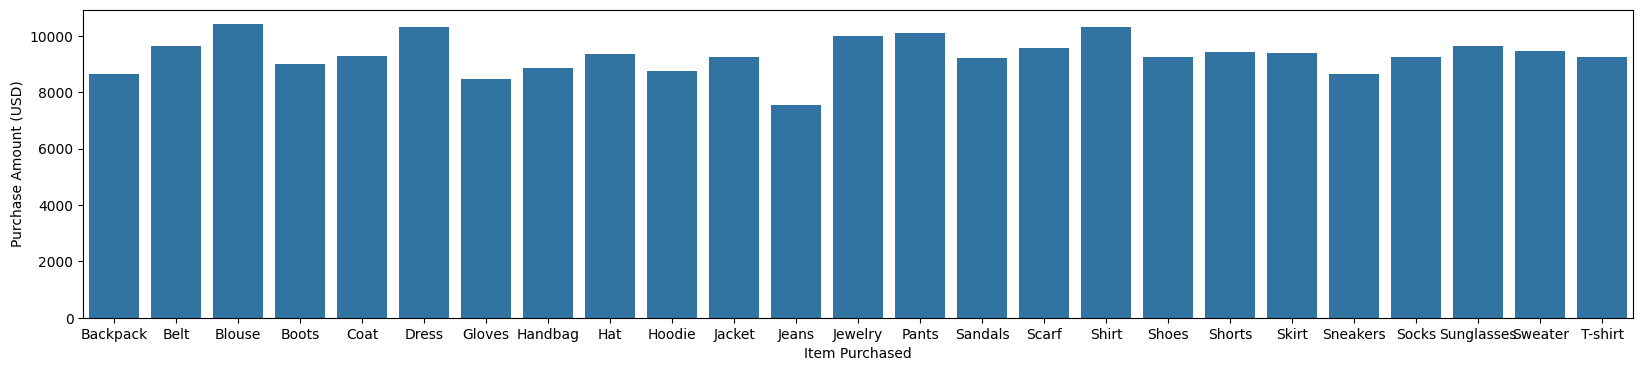

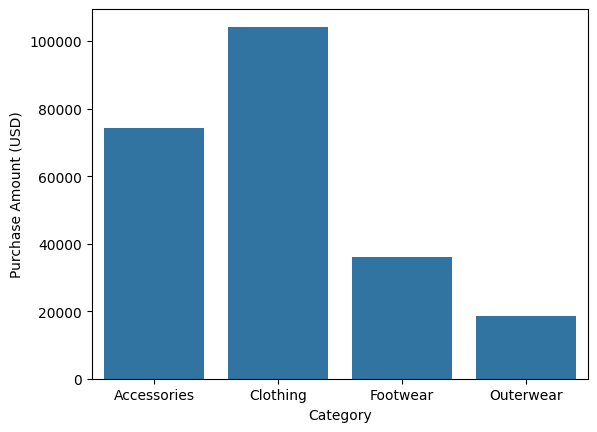

In [45]:
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
item_sales = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(20,4))
sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=item_sales)
plt.show()
sns.barplot(x='Category', y='Purchase Amount (USD)', data=category_sales)
plt.show()

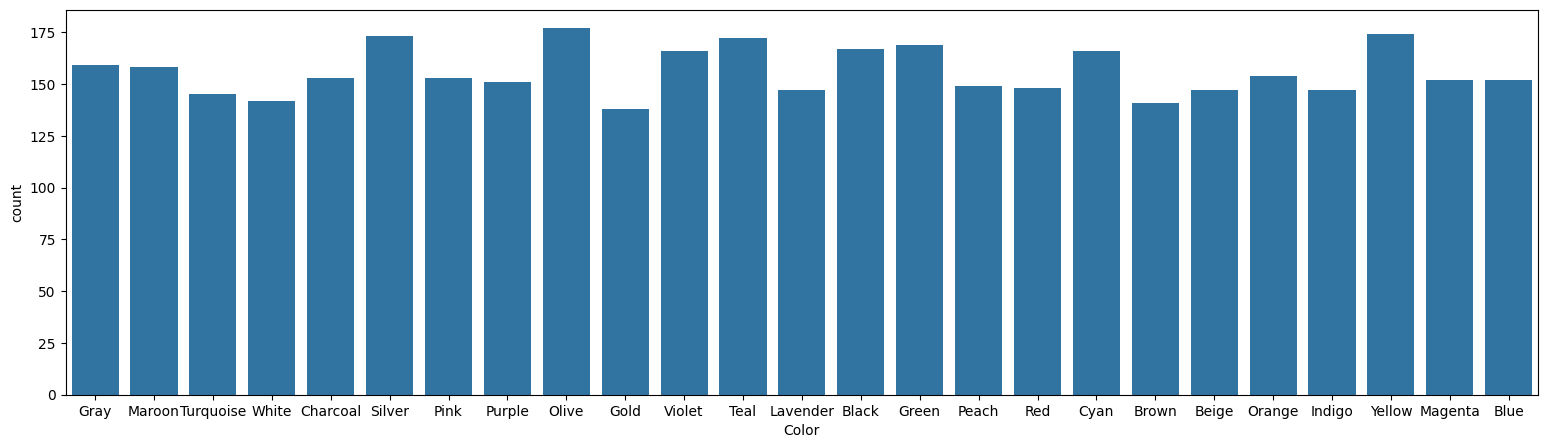

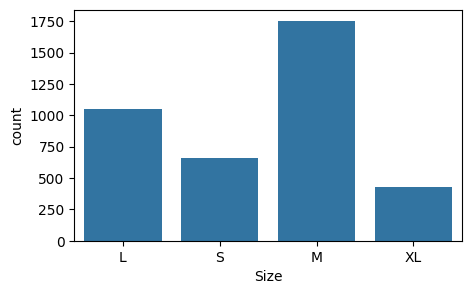

In [46]:
plt.figure(figsize=(19,5))
sns.countplot(x='Color', data=df)
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x='Size', data=df)
plt.show()

<Axes: xlabel='Color', ylabel='count'>

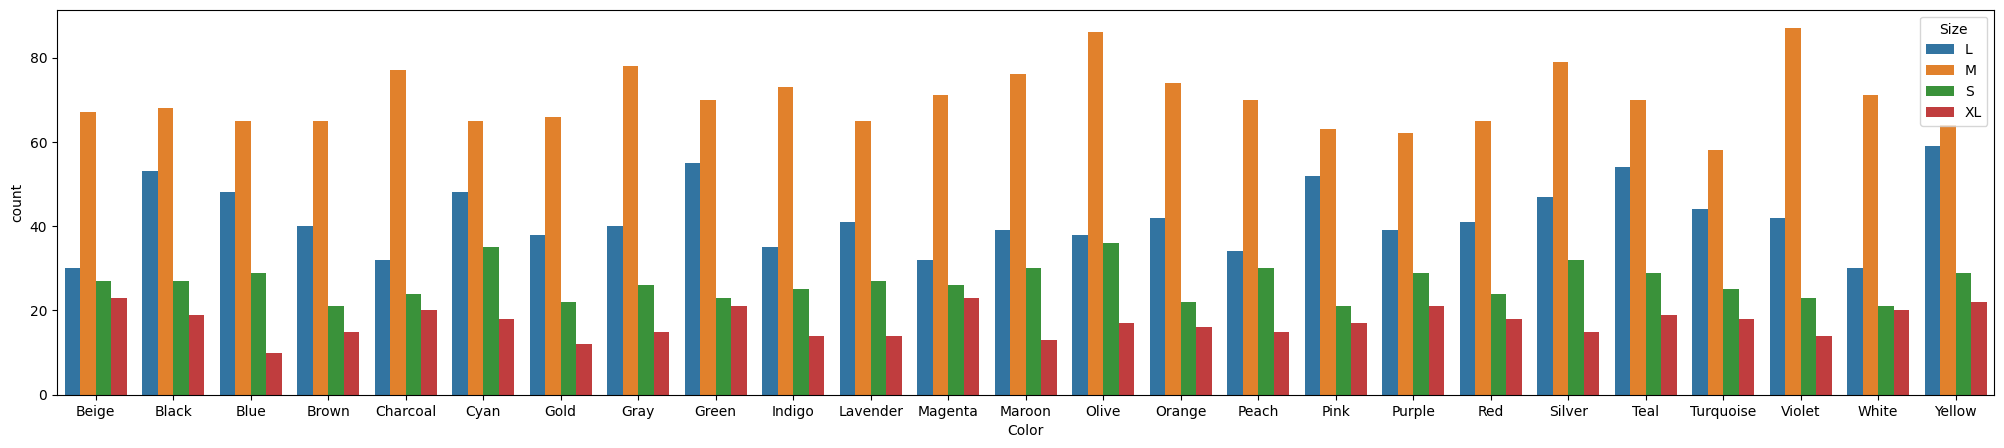

In [47]:
color_size_counts = df.groupby(['Color', 'Size']).size().reset_index(name='count')
plt.figure(figsize=(25,5))
sns.barplot(x='Color', y='count', hue='Size', data=color_size_counts)

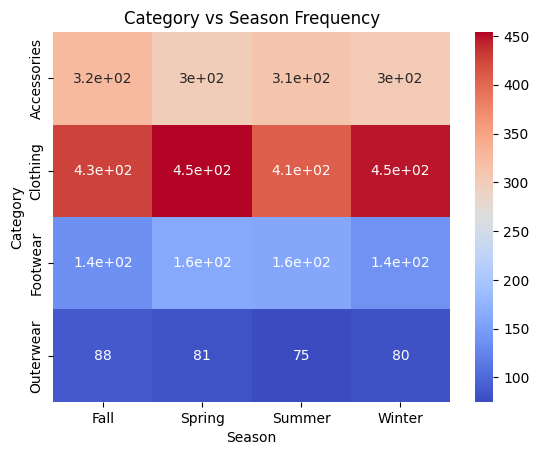

Season       Fall  Spring  Summer  Winter
Category                                 
Accessories   324     301     312     303
Clothing      427     454     408     448
Footwear      136     163     160     140
Outerwear      88      81      75      80


In [48]:
category_season_ct = pd.crosstab(df['Category'], df['Season'])
sns.heatmap(category_season_ct, annot=True, cmap='coolwarm')
plt.title('Category vs Season Frequency')
plt.show()
print(category_season_ct)

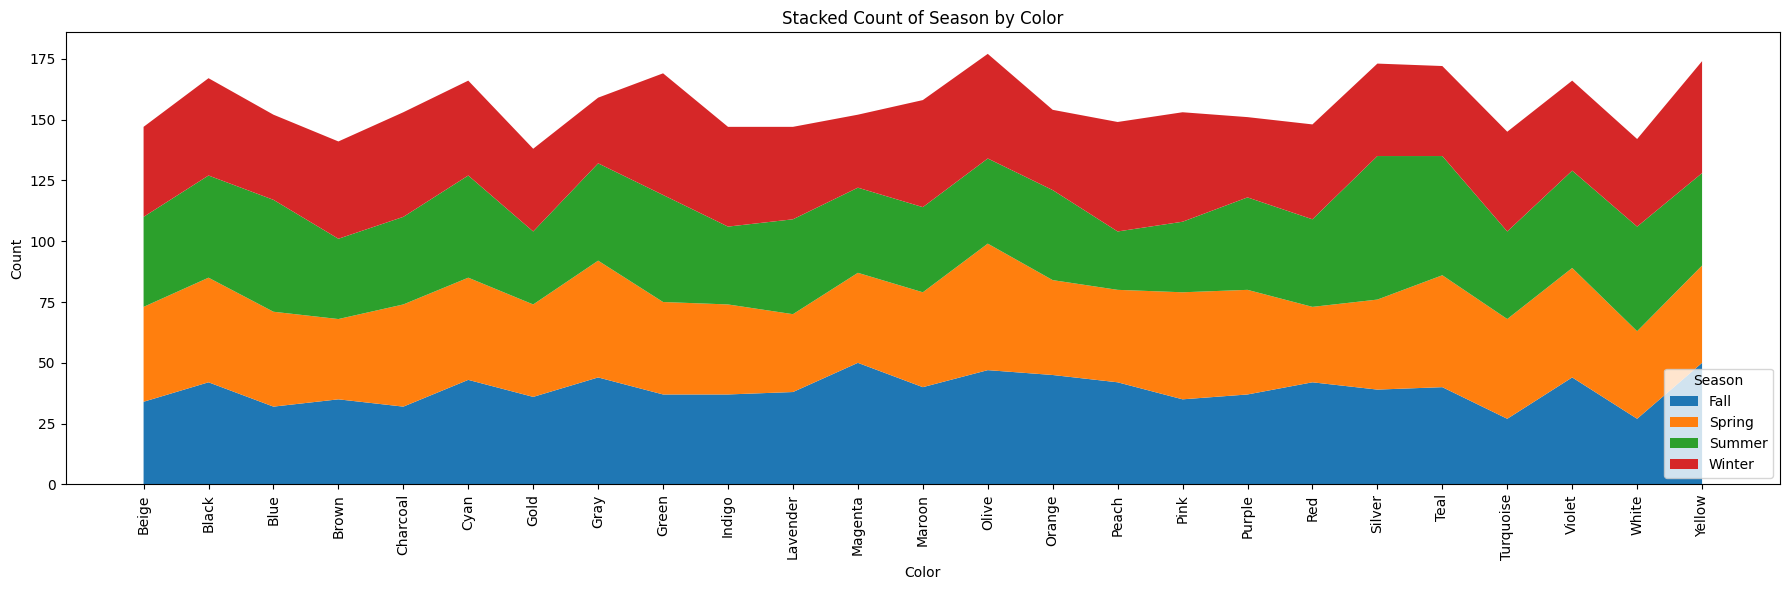

In [49]:
color_season_count = df.groupby(['Color', 'Season']).size().reset_index(name='count')
pivot_df = color_season_count.pivot(index='Color', columns='Season', values='count').fillna(0)

x = pivot_df.index
y = [pivot_df[season] for season in pivot_df.columns]

plt.figure(figsize=(18, 6))
plt.stackplot(x, y, labels=pivot_df.columns)
plt.legend(title='Season')
plt.title('Stacked Count of Season by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [50]:
df.head(20)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


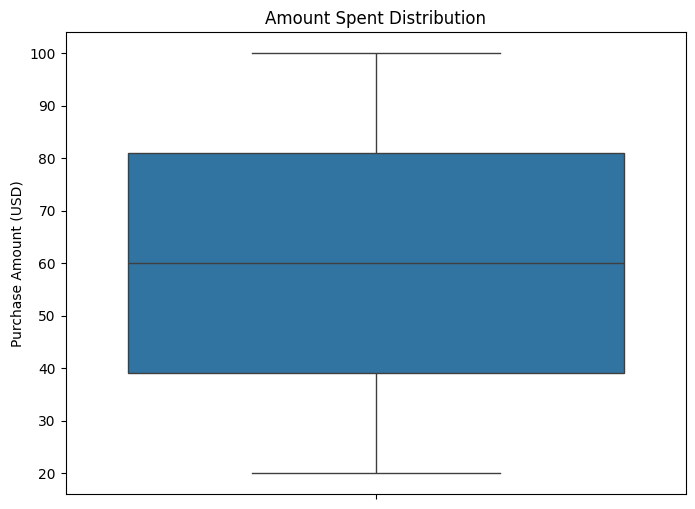

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Purchase Amount (USD)'])
plt.title('Amount Spent Distribution')
plt.ylabel('Purchase Amount (USD)')
plt.show()

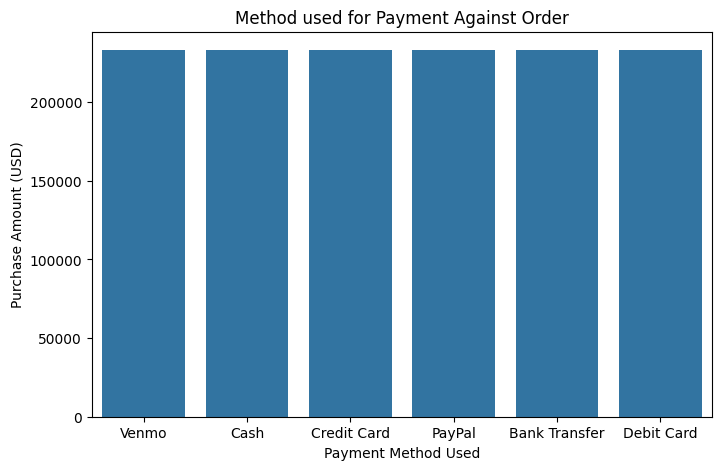

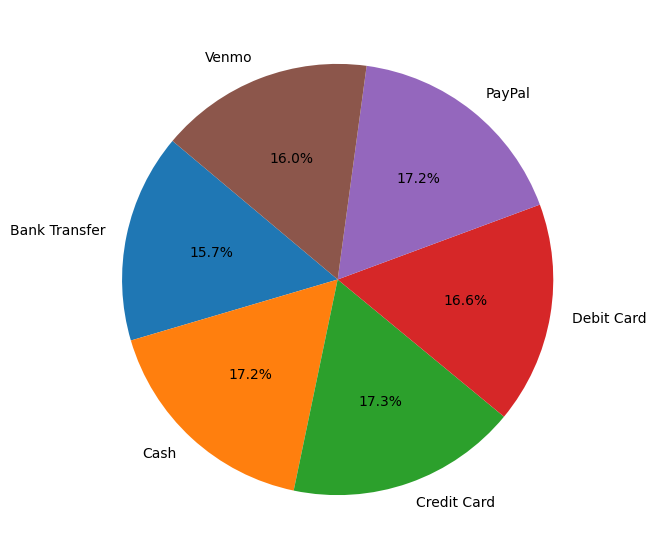

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Payment Method'], y=df['Purchase Amount (USD)'].sum())
plt.xlabel('Payment Method Used')
plt.ylabel('Purchase Amount (USD)')
plt.title('Method used for Payment Against Order')
plt.show()

payment_sales = df.groupby('Payment Method')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(7,7))
plt.pie(payment_sales, labels=payment_sales.index, autopct='%1.1f%%', startangle=140)
plt.show()

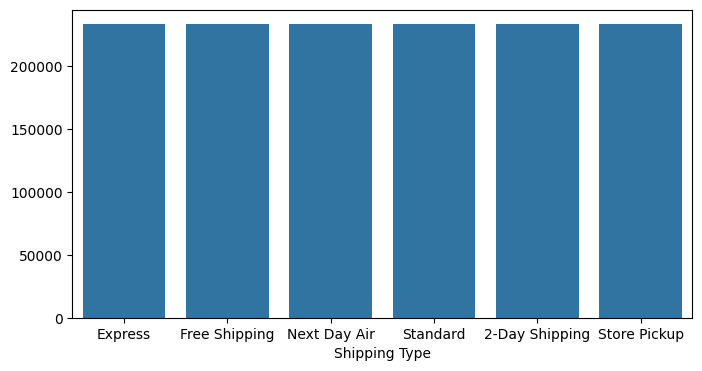

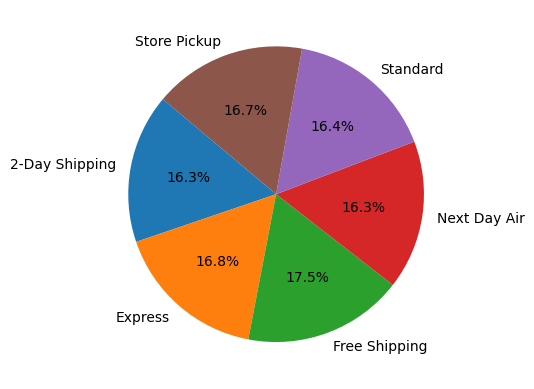

In [53]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['Shipping Type'], y=df['Purchase Amount (USD)'].sum())
plt.show()
shipping_sales = df.groupby('Shipping Type')['Purchase Amount (USD)'].sum()
plt.pie(shipping_sales, labels=shipping_sales.index, autopct='%1.1f%%', startangle=140)
plt.show()

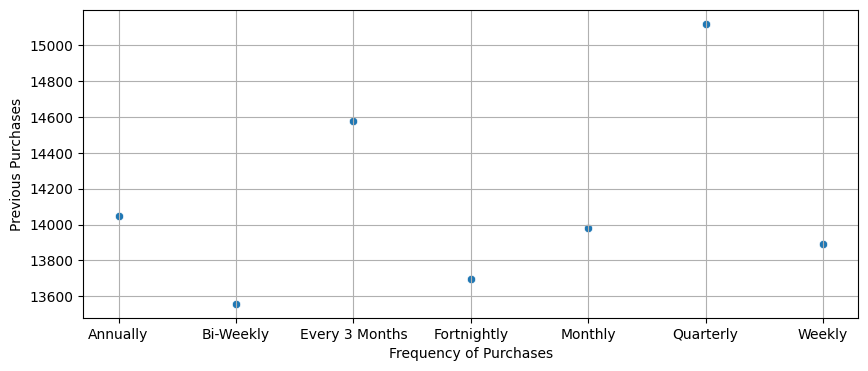

In [54]:
ferquency_purchase = df.groupby('Frequency of Purchases')['Previous Purchases'].sum().reset_index()
plt.figure(figsize=(10,4))
sns.scatterplot(data=ferquency_purchase, x='Frequency of Purchases', y='Previous Purchases')
plt.grid(True)

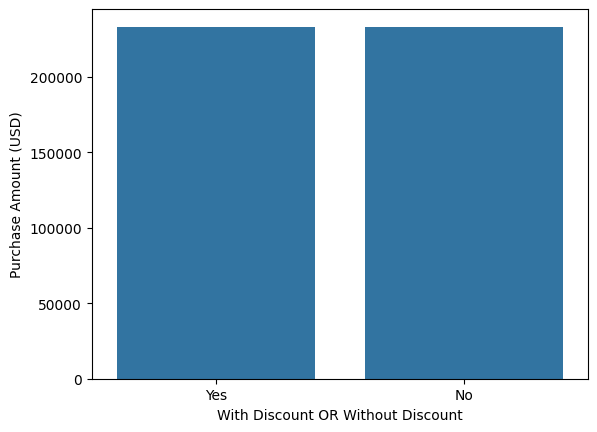

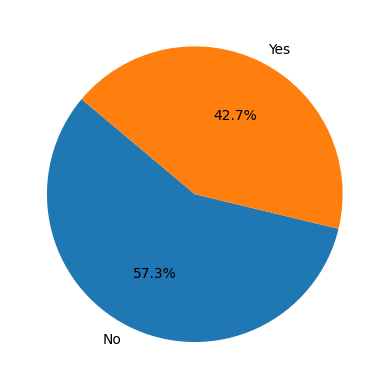

In [55]:
sns.barplot(x=df['Discount Applied'], y=df['Purchase Amount (USD)'].sum())
plt.xlabel('With Discount OR Without Discount')
plt.ylabel('Purchase Amount (USD)')
plt.show()
discount_sales = df.groupby('Discount Applied')['Purchase Amount (USD)'].sum()
plt.pie(discount_sales, labels=discount_sales.index, autopct='%1.1f%%', startangle=140)
plt.show()

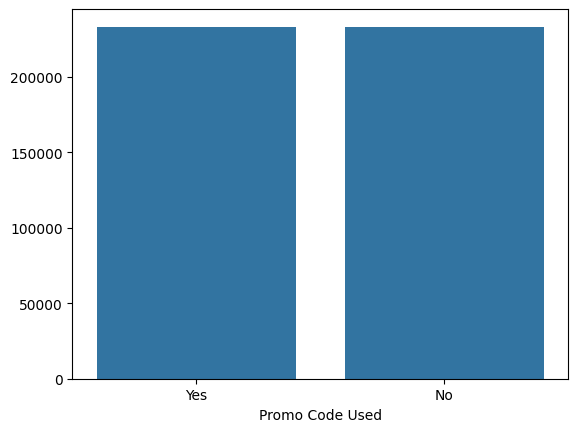

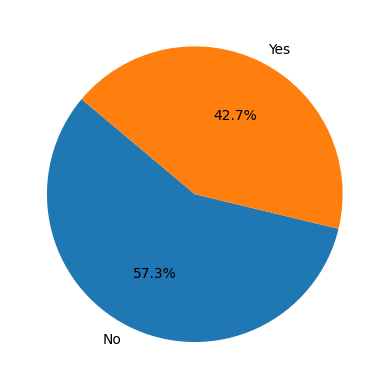

In [56]:
sns.barplot(x=df['Promo Code Used'], y=df['Purchase Amount (USD)'].sum())
plt.show()
promo_sales = df.groupby('Promo Code Used')['Purchase Amount (USD)'].sum()
plt.pie(promo_sales, labels=promo_sales.index, autopct='%1.1f%%', startangle=140)
plt.show()

#return same as above as discount is applied by promo codes.(assuming other factors ar constant as seen same result with discount and promo code)

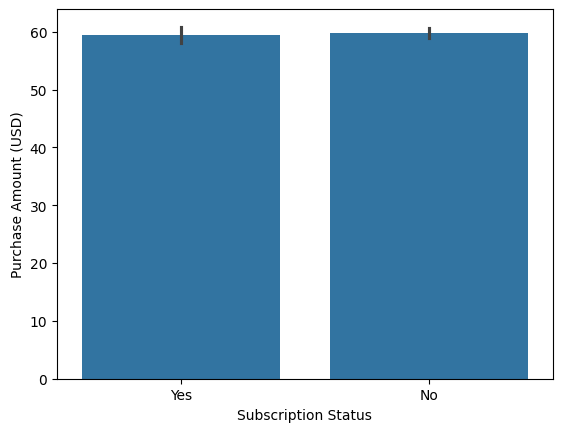

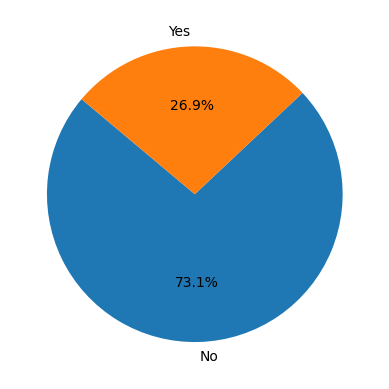

In [57]:
sns.barplot(x=df['Subscription Status'], y=df['Purchase Amount (USD)'])
plt.show()
subs_status = df.groupby('Subscription Status')['Purchase Amount (USD)'].sum()
plt.pie(subs_status, labels=subs_status.index, autopct='%1.1f%%', startangle=140)
plt.show()

<Axes: xlabel='Subscription Status', ylabel='Review Rating'>

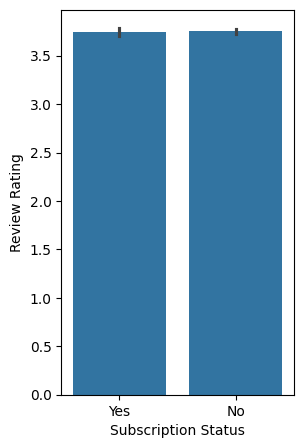

In [58]:
plt.figure(figsize=(3,5))
sns.barplot(x=df['Subscription Status'], y=df['Review Rating'])

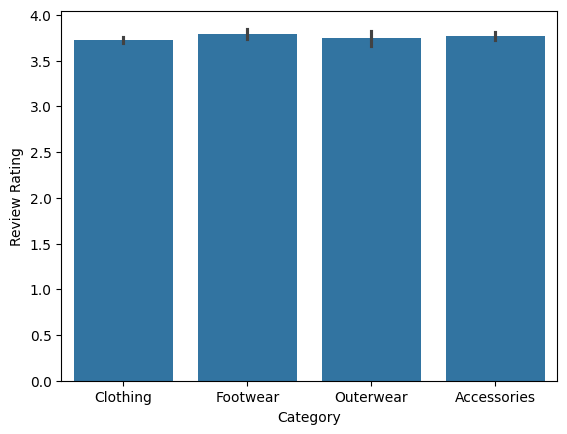

Average Rating: 3.7499487179487176


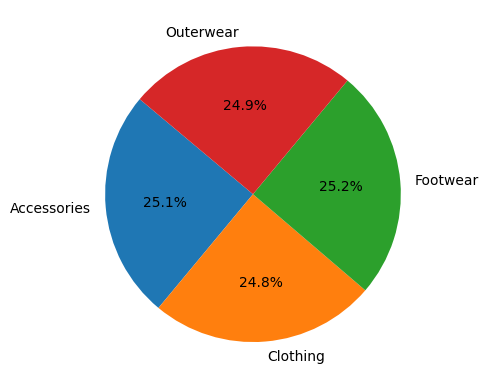

In [59]:
sns.barplot(x=df['Category'], y=df['Review Rating'])
plt.show()
print(f'Average Rating: {df['Review Rating'].mean()}')

rr_category = df.groupby('Category')['Review Rating'].mean()
plt.pie(rr_category, labels=rr_category.index, autopct='%1.1f%%', startangle=140)
plt.show()

<Axes: xlabel='Discount Applied', ylabel='Review Rating'>

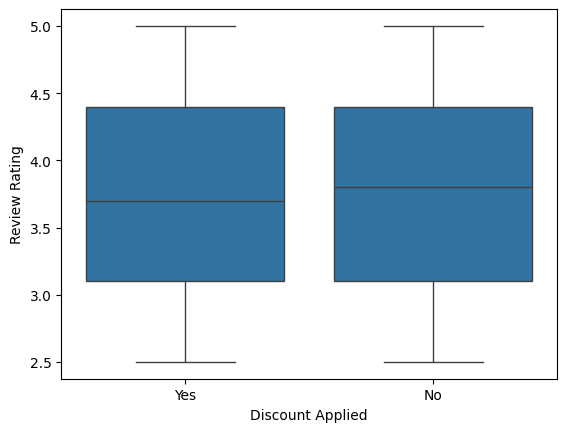

In [60]:
sns.boxplot(data=df, x='Discount Applied', y='Review Rating')

<Axes: xlabel='Shipping Type', ylabel='Review Rating'>

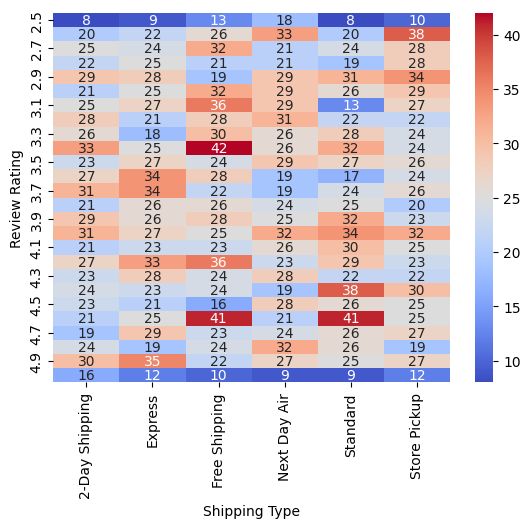

In [61]:
rate_ship = pd.crosstab(df['Review Rating'], df['Shipping Type'])
sns.heatmap(rate_ship, annot=True, cmap='coolwarm')

<Axes: >

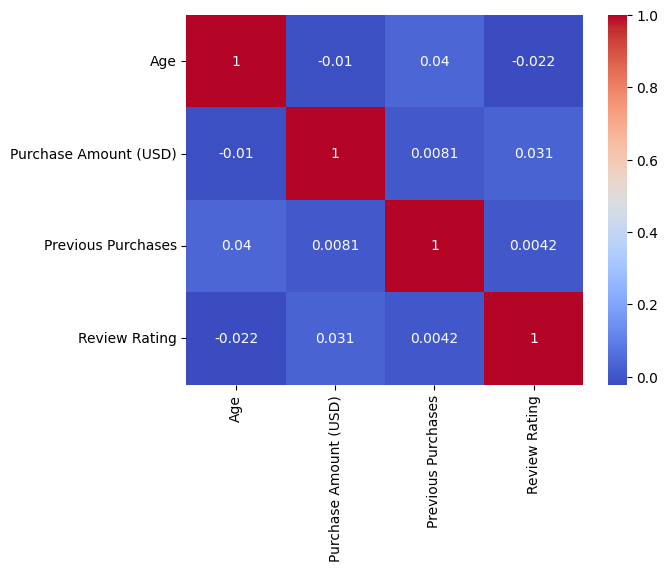

In [62]:
age_corr = df[['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']].corr()
sns.heatmap(age_corr, annot=True, cmap='coolwarm')

## Conclusion
The Shopping behaviour remained average or can be said constant at some point. No high Volatility seen in behaviour of customers.